 # Задача 6 вариант 2 по курсу Введение в Численные Методы
                Задворный Даниэль Сергеевич 217 группа

# Постановка задачи
<center><h3>
Решить систему линейных алгебраических уравнений: <br>
$-γγ_{i-1} + 2γ_{i} + γγ_{i+1} = f_{i}, i = 1...N-1$ <br>
$γ_{0} = f_{0}, γ_{N} = f_{N}$ <br><br>
Где $1 \leq γ \leq \frac{3}{2}$ <br> <br>
А также выяснить: </center>

1.   Выяснить, как величина $\gamma$ влияет на решение при данном $N$.
2.   Выбрать метод и обосновать его применимость
<center> <br> <br>
В нашем случае мы имеем $N = 100, N = 1000$ <br>
$f(x) = 
\begin{cases}
  0, i = 0..10 \\ 
  0.1, i = 11..60\\ 
  0, i = 61..N
 \end{cases}
$ 
</h3></center>



# Методы решения

<h3>
Запишем нашу систему уравнений в удобном виде: 
<br><center>
$Dx = f$ 
</center><br>
Тогда, очевидно, мы имеем уравнение, в которой матрица $D$ является трёхдиагональной. <br>
Для начала проверим, что матрица $D$ является невырожденной: <br>
Наша матрица имеет  порядок $N-1$, заметим, что ее определитель можно посчитать через рекуррентные соотношения, обозначим <br>
$Δ_{i}$ - определитель матрицы $i-го$ порядка, тогда получаем рекуррентное соотношение: <br><center>
$Δ_{n-1} = 2Δ_{n-2}+γ^{2}Δ_{n-3}$ 
</center><br>
Из курса линейной алгебры известно, что для решения данного рекуррентного соотношения необходимо: <br>
<br><center>
$x^{2} - 2x - γ^{2} =0$
</center><br>
Пусть его корни $x_{1}$ и $x_{2}$, которые всегда существуют, различны и не равны нулю в силу того, что $1 \leq γ \leq \frac{3}{2}$
<br>
Из вида матрицы мы знаем, что $Δ_{1} = 2$, $Δ_{2} = 4 + γ^{2}$
<br>
Известно, что $Δ_{n} = C_{1}x_{1}^{n}+C_{2}x_{2}^{n}$, тогда находим неопределенные коэффициенты: 
<br><center>
$C_{1} = \frac{2x_{2}^{2}-(4+γ^{2})x_{2}}{x_{1}x_{2}(x_{2}-x_{1})}$
<br>
$C_{2} = \frac{-2x_{1}^{2}+(4+γ^{2})x_{1}}{x_{1}x_{2}(x_{2}-x_{1})}$
</center><br>
Откуда получаем, что $Δ_{n-1} \neq 0$, следовательно решение есть и при том единственно.<br>

<h3>
Для решения СЛАУ воспользуемся методом прогонки:
<br>
Пусть заданые уравнения вида:
<br><center>
$A_{i}x_{i-1}+C_{i}x_{i} + B_{i}x_{i+1} = F_{i}, i= 1..n-1$
<br>
$x_{0} = q_{0}$, $x_{n} = q_{n}$
</center><br>
Суть метода заключается в предположении, что искомые неизвестные $x_{i}$ $x_{i+1}$ связаны рекуррентным соотношением:
<br>
$x_{i} = α_{i+1}x_{i+1} + β_{i+1}, 0 \leq i \leq n-1$
<br>
Из курса лекций известно, что имеют место следующие равенства при $i = 1..n-1$:
<br><center>
$A_{i}α_{i}α_{i+1} + C_{i}α_{i+1}+B_{i} = 0$ $(***)$
<br>
$A_{i}α_{i}β_{i+1} + A_{i}β_{i} + C_{i}β_{i+1}-F_{i} = 0$
<br>
$α_{1} = 0$, $β_{1} = q_{0}$
</center><br>
Очевидно, для корректности даного метода необходимо проверить, что $A_{i}α_{i}+C_{i} \neq 0, i=1..n-1$ и что $|α_{i}| \leq 1$
<br>
В нашем случае мы имеем $α_{1} = 0$, $β_{1} = f_{0}$
<br>
Так как $A_{i} = A_{j}$, аналогично для $B, C$, тогда докажем по индукции, что 
<br>
$|α_{i}| \leq 1$
<br>

* ### База: $α_{1} = 0$ - выполнено 
* ### Пусть выполнено для всех $i \leq k$, проверим для $i = k+1$
Так же заметим, что $A_{i}α_{i}+C_{i} = γα_{i}+2 \neq 0$, для всех $i \leq k$, потому что иначе имеем, что $\alpha_{i} = -\frac{2}{γ}$, а так как $1 \leq γ \leq \frac{3}{2}$, то $|α_{i}| \ge 1$, что противоречит предположению индукции
<br>
Из $(***)$ получаем $\alpha_{k+1} = \frac{-B_{k}}{A_{k}α_{k}+C_{k}} = \frac{-γ}{γα_{k} + 2}$ из неравенств на $γ, α_{k}$, получаем, что $|α_{k+1}| \leq 1$, а следовательно и $γα_{k+1}+2 \neq 0$ $Q.E.D$
<br>

### Тем самым мы доказали корректность метода, ведь у нас не будет деления на ноль при вычислениях коэффициентов $α_{i}, β_{i}$, а также не будет увеличиваться ошибка при неточностях вычислений на компьютере, что обеспечивается неравенством $|α_{i}| \leq 1$












# Реализация вычислений
### Было принято решение реализовать вычисления посредством языка высокого уровня python3
### Реализована функция

```
# solve(a: list, b: list, c: list, f:list) -> list
```
Где $a: list$ - список коэффициентов $A_{i}$  с предварительным добавлением в $a[0] = 0$, для удобства вычислений \\
Где $b: list$ - список коэффициентов $C_{i}$ \\
Где $c: list$ - список коэффициентов $B_{i}$ с предварительным добавлением в $c[N-1] = 0$, для удобства вычислений<br> 
Где $a: list$ - список коэффициентов $F_{i}$ \\
В которой реализован как прямой ход метода прогонки, так и обратный 
<br>
Так же внутри функции мы объявляем два списка $alpha[N]$, $beta[N]$, в которых будут храниться $α_{i}$ и $β_{i}$ соответсвенно

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def solve(a: list, b: list, c: list, f: list) -> list:
    '''
    a_i * x_(i-1) + b_i * x_i + c_i * x_(i+1) =  f_i   for i = 1, N-1
    '''
    n = len(f)  # number of equations
    alpha = np.array([0]*(n+1), dtype=float)
    beta = np.array([0]*(n+1), dtype=float)
    f[0] -= c[0]*f[0]
    alpha[0] = 0
    beta[0] = f[0]
    for i in range(0, n): # прямой ход
        alpha[i+1] = -c[i]/(a[i]*alpha[i] + b[i])
        beta[i+1] = (f[i] - a[i]*beta[i])/(a[i]*alpha[i] + b[i])

    x = np.array([0]*(n+1), dtype=float)
    x[0] = f[0]
    x[-1] = f[-1]
    for i in range(n - 1, -1, -1): #обратный ход
        x[i] = alpha[i+1]*x[i+1] + beta[i+1]

    return x


### В следующем блоке предлагается ввести значение $N$ $100$ или $1000$ и $1 \leq \gamma \leq \frac{3}{2}$

In [ ]:
print("Input N:")
N = int(input())

assert N in [100, 1000]

print("Input gamma:")
gamma = float(input())

assert 1 <= gamma <= 1.5


Input N:
1000
Input gamma:
1.5


### Следующий блок позволяет решить СЛАУ и вывести его решение  при параметрах, введеных на прошлом шаге

In [ ]:
def get_solution(gamma: float, N: int):
  a = np.zeros(N, dtype=float)
  b = np.zeros(N, dtype=float)
  c = np.zeros(N, dtype=float)
  for i in range(N):
      if i:
          a[i] = -gamma
      else:
          a[i] = 0
      b[i] = 2
      if i < N-1:
          c[i] = gamma
      else:
          c[i] = 0



  f = np.zeros(N, dtype=float)
  for i in range(11, 61):
      f[i] = 0.1

  my_x = solve(a, b, c, f)[:N]
  return my_x[:N]

print(*get_solution(gamma, N), sep='\n')


-2.3976372436448823e-05
3.196849658193175e-05
-6.660103454569116e-05
0.0001207698759761866
-0.00022762753584727323
0.0004242732571058842
-0.0007933252119884521
0.0014820402064238199
-0.0027693788205535447
0.005174545300495211
-0.009668772554547157
0.018066242039891416
0.032909571392264275
0.040853480183539057
0.04510493114754553
0.047380238653478346
0.04859794627624106
0.04924964361849027
0.049598421451587354
0.04978508168304045
0.04988497920753342
0.049938442739662574
0.04996705555464999
0.049982368666795916
0.04999056399892211
0.04999495000156643
0.049997297330166876
0.04999855356134392
0.049999225915041676
0.04999958567462166
0.04999977834887946
0.04999988120944905
0.04999993673628071
0.04999996556107477
0.04999998265484769
0.049999988687944516
0.049999997737588335
0.04999999170449339
0.050000008798263815
0.049999979973474974
0.05000003550029718
0.049999932639745386
0.050000125313969995
0.04999976555445207
0.050000437908033914
0.049999181677073526
0.05000152900526919
0.0499971430033

### Следующий блок является вспомогательным: он позволяет исследовать норму невзяки и норму самого решения при $γ$ от $1$  до $\frac{3}{2}$

In [ ]:
from numpy.linalg.linalg import Inf
gammas = []
residuals = []
norms = []
gamma = 1.0
while gamma <= 1.5:

    a = np.zeros(N, dtype=float)
    b = np.zeros(N, dtype=float)
    c = np.zeros(N, dtype=float)
    for i in range(N):
        if i:
            a[i] = -gamma
        else:
            a[i] = 0
        b[i] = 2
        if i < N-1:
            c[i] = gamma
        else:
            c[i] = 0
   

    A = [[0.0]*N for i in range(N)]
    A = np.array(A)

    for i in range(N):
        if i - 1 > -1:
            A[i][i-1] = a[i]
        A[i][i] = b[i]
        if i + 1 < N:
            A[i][i+1] = c[i]
  

    f = np.zeros(N, dtype=float)
    for i in range(11, 61):
        f[i] = 0.1

    my_x = solve(a, b, c, f)[:N]
    np_x = np.linalg.solve(A,f)

    norms.append(np.linalg.norm(my_x, ord=Inf))
  
    gammas.append(gamma)
    residuals.append(np.linalg.norm(my_x - np_x))
    gamma+=0.05


### Пусть $x$ - решение полученное нашим алгоритмом при N = 100
### Посмотрим на $||x||_{∞}(γ) $

<function matplotlib.pyplot.show(*args, **kw)>

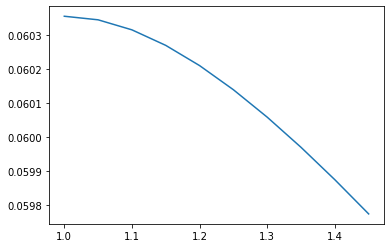

In [ ]:
plt.plot(np.array(gammas), np.array(norms))
plt.show


### Пусть $x$ - решение полученное нашим алгоритмом при N = 1000
### Посмотрим на $||x||_{∞}(γ) $

<function matplotlib.pyplot.show(*args, **kw)>

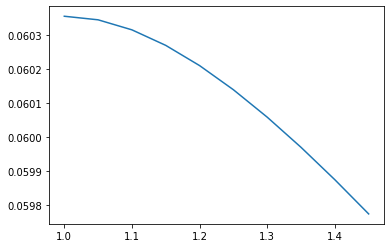

In [ ]:
plt.plot(np.array(gammas), np.array(norms))
plt.show

### Пусть $\tilde{x}$ - исходый вектор решение нашей СЛАУ, полученный через **numpy**
<br>

### $x$ - вектор, полученный нашим алгоритмом 
<br>

### Тогда рассмотрим $ ||\tilde{x} - x||_{2}(γ)$ - 2-норму вектора невязки при $N = 1000$

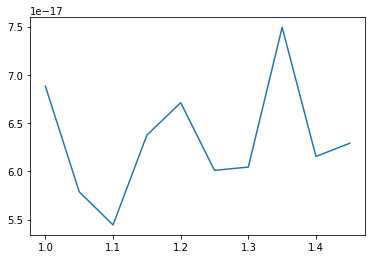

In [ ]:
plt.plot(np.array(gammas), np.array(residuals))
plt.show()

### Заметим, что $x_{i}$ не зависит от $N$, то есть для любого $N$ первые $x_{i}$ будут одинаковыми для всех, поэтому было решено посмотреть как меняются $x_{i}$  в зависимости от $\gamma$
### Были выбраны $\gamma$ равные $1, \frac{4}{3}, \frac{3}{2}$

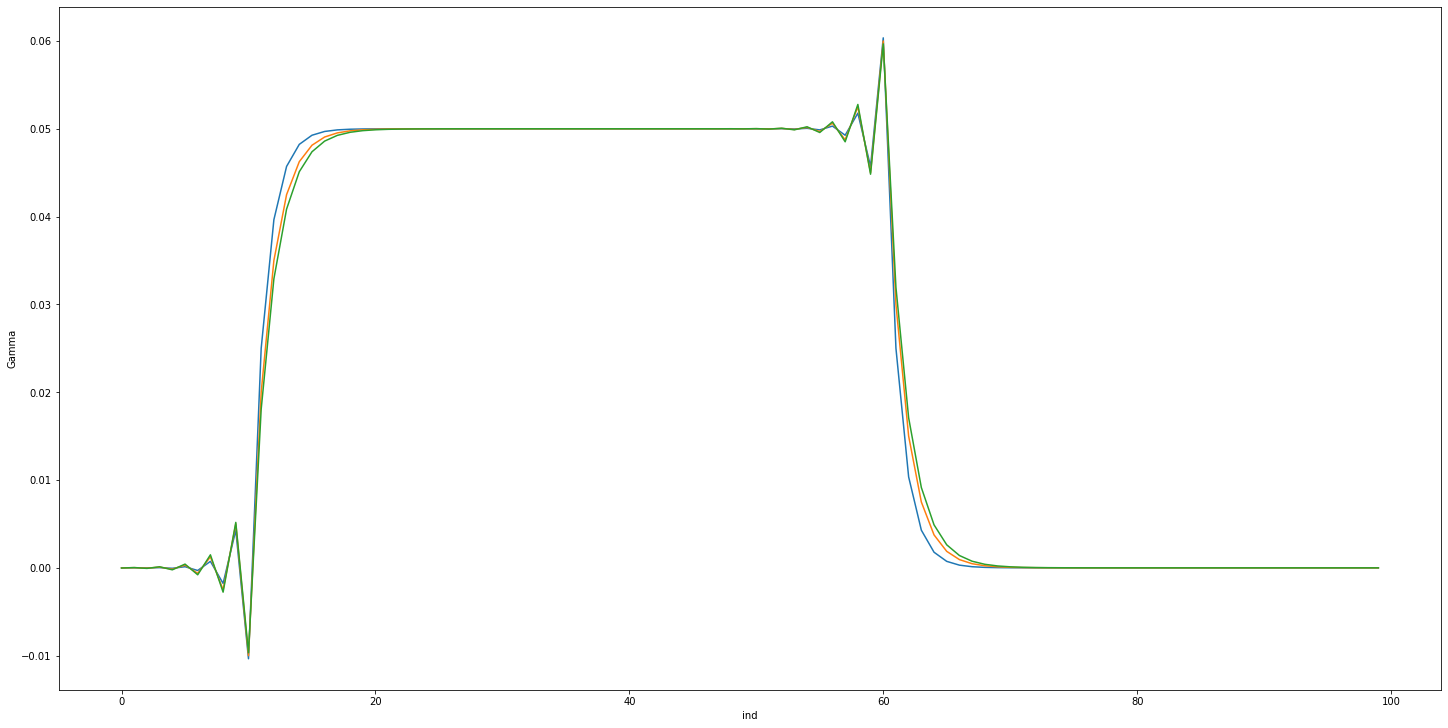

In [ ]:
x1 = get_solution(1, 100)
x2 = get_solution(4/3, 100)
x3 = get_solution(3/2, 100)
ind = [i for i in range(100)]
fig, ax =  plt.subplots(1, 1, figsize = (20, 10), constrained_layout=True, squeeze= True)
ax.set_ylabel('Gamma')
ax.set_xlabel('ind')
ax.plot(ind, x1)
ax.plot(ind, x2)
ax.plot(ind, x3)

### Можем видеть выше, что для каждого $γ$ график выше ведет себя примерно одним образом, а также что $x_i$ достаточно быстро стремятся к нулю

# Выводы
### Был реализован функционал решения СЛАУ с трёхдиагональной матрицей.
### Из графиков мы поняли, что $x_i$ очень быстро стремятся к нулю, а значит при больших $N$ и увеличении $\gamma$ может теряться точность, так как компьютеру уже при N = 1000 приходится хранить числа порядка $10^{-257}$, но в целом алгоритм показывает себя очень эффективно ведь работает за $O(N)$ по времени и по дополнительной памяти, а также 2-норма вектора невязки не превышает $10^{-16}$.